In [1]:
import pandas as pd
df = pd.read_csv('penguins_simple.csv', sep=';')
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,39.3,20.6,190.0,3650.0,MALE


In [3]:
df.groupby(['Species', 'Sex'])['Body Mass (g)'].mean()

Species    Sex   
Adelie     FEMALE    3368.835616
           MALE      4043.493151
Chinstrap  FEMALE    3527.205882
           MALE      3938.970588
Gentoo     FEMALE    4679.741379
           MALE      5484.836066
Name: Body Mass (g), dtype: float64

In [4]:
type(df.groupby(['Species', 'Sex'])['Body Mass (g)'].mean())

pandas.core.series.Series

In [5]:
df.groupby(['Species', 'Sex'])[['Body Mass (g)']].mean() # double [] makes it look like a spreadsheet

Body Mass (g)
Species   Sex                  
Adelie    FEMALE    3368.835616
          MALE      4043.493151
Chinstrap FEMALE    3527.205882
          MALE      3938.970588
Gentoo    FEMALE    4679.741379
          MALE      5484.836066

In [6]:
avgs = df.groupby(['Species', 'Sex'])['Body Mass (g)'].mean(); avgs

Species    Sex   
Adelie     FEMALE    3368.835616
           MALE      4043.493151
Chinstrap  FEMALE    3527.205882
           MALE      3938.970588
Gentoo     FEMALE    4679.741379
           MALE      5484.836066
Name: Body Mass (g), dtype: float64

In [7]:
avgs.unstack(1) # this is pivoting or unstacking

Sex,FEMALE,MALE
Species,,
Adelie,3368.835616,4043.493151
Chinstrap,3527.205882,3938.970588
Gentoo,4679.741379,5484.836066


In [8]:
avgs.unstack(0)

Species,Adelie,Chinstrap,Gentoo
Sex,,,
FEMALE,3368.835616,3527.205882,4679.741379
MALE,4043.493151,3938.970588,5484.836066


In [9]:
pivoted = avgs.unstack(0); pivoted

Species,Adelie,Chinstrap,Gentoo
Sex,,,
FEMALE,3368.835616,3527.205882,4679.741379
MALE,4043.493151,3938.970588,5484.836066


<AxesSubplot:xlabel='Sex'>

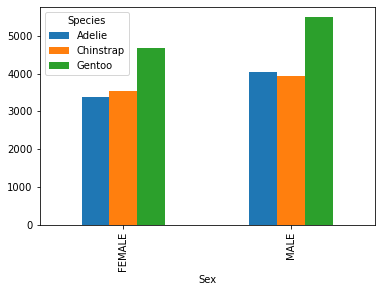

In [10]:
pivoted.plot.bar()

In [13]:
pivoted1 = avgs.unstack(1); pivoted0

Species,Adelie,Chinstrap,Gentoo
Sex,,,
FEMALE,3368.835616,3527.205882,4679.741379
MALE,4043.493151,3938.970588,5484.836066


<AxesSubplot:xlabel='Species'>

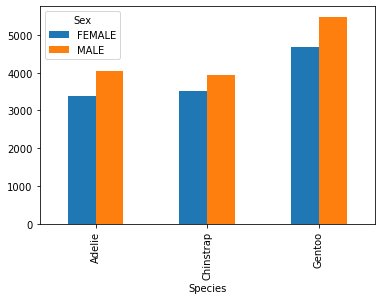

In [14]:
pivoted1.plot.bar()

In [17]:
pivoted1.stack().reset_index()

,Species,Sex,0
0,Adelie,FEMALE,3368.835616
1,Adelie,MALE,4043.493151
2,Chinstrap,FEMALE,3527.205882
3,Chinstrap,MALE,3938.970588
4,Gentoo,FEMALE,4679.741379
5,Gentoo,MALE,5484.836066


In [19]:
import numpy as np

In [24]:
data = [['John Smith', np.nan, 2.0], ['Jane Doe', 16.0, 11.0], ['Mary Johnson', 3.0, 1.0]]
columns = ['person', 'treatment_a', 'treatment_b']
untidy = pd.DataFrame(columns=columns, data = data)

In [25]:
untidy

,person,treatment_a,treatment_b
0,John Smith,NaN,2.0
1,Jane Doe,16.0,11.0
2,Mary Johnson,3.0,1.0


In [27]:
untidy.set_index('person').stack(dropna=False).reset_index()

,person,level_1,0
0,John Smith,treatment_a,NaN
1,John Smith,treatment_b,2.0
2,Jane Doe,treatment_a,16.0
3,Jane Doe,treatment_b,11.0
4,Mary Johnson,treatment_a,3.0
5,Mary Johnson,treatment_b,1.0


In [31]:
pd.melt(untidy, id_vars='person',var_name='treatment_type', value_name='result')

,person,treatment_type,result
0,John Smith,treatment_a,NaN
1,Jane Doe,treatment_a,16.0
2,Mary Johnson,treatment_a,3.0
3,John Smith,treatment_b,2.0
4,Jane Doe,treatment_b,11.0
5,Mary Johnson,treatment_b,1.0
